## Getting the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import warnings
from pathlib import Path
warnings.filterwarnings("ignore")
plt.style.use("seaborn")

In [4]:
data = pd.read_csv(
Path("../data/BTCUSDT1H.csv"), parse_dates = ["Date"], index_col = "Date")

data.columns=(["Open", "High", "Low", "Close", "Volume"])

data = data[["Close"]].copy()

data["returns"] = np.log(data.Close.div(data.Close.shift(1)))



## Formulating a Triple SMA Crossover Strategy

In [5]:
SMA_S = 15
SMA_M = 50
SMA_L = 200

data["SMA_S"] = data.Close.rolling(window = SMA_S).mean()
data["SMA_M"] = data.Close.rolling(window = SMA_M).mean()
data["SMA_L"] = data.Close.rolling(window = SMA_L).mean()

data.dropna(inplace = True)

smas = ["SMA_S", "SMA_M", "SMA_L"]
smas

data["position"] = 0 # Trading position -> Neutral for all bars
data

cond1 = (data.SMA_S > data.SMA_M) & (data.SMA_M > data.SMA_L)
cond1

cond2 = (data.SMA_S < data.SMA_M) & (data.SMA_M < data.SMA_L)
cond2

data.loc[cond1, "position"] = 1
data.loc[cond2, "position"] = -1

In [6]:
data.position.value_counts()

 0    14832
 1    13171
-1    10048
Name: position, dtype: int64

In [7]:
data.tail(50)

,Close,returns,SMA_S,SMA_M,SMA_L,position
Date,,,,,,
2021-12-28 16:00:00,47286.18,0.000652,47220.461333,47142.1584,48388.24065,0
2021-12-28 17:00:00,47050.08,-0.005006,47205.584000,47157.0802,48370.49095,0
2021-12-28 18:00:00,47116.71,0.001415,47200.772000,47175.0758,48352.16575,0
2021-12-28 19:00:00,46999.98,-0.002481,47185.070667,47181.9528,48332.23395,0
2021-12-28 20:00:00,46793.26,-0.004408,47151.758000,47182.2552,48311.75450,-1
2021-12-28 21:00:00,46822.26,0.000620,47130.752000,47182.4650,48291.60165,-1
2021-12-28 22:00:00,47078.64,0.005461,47128.491333,47187.7738,48272.19480,-1
2021-12-28 23:00:00,46923.75,-0.003295,47100.710000,47192.0278,48253.76565,-1
2021-12-29 00:00:00,47051.37,0.002716,47051.314667,47189.2042,48237.02420,-1


## Backtesting

In [8]:
class Long_Short_Backtester():
    ''' Class for backtesting of simple Long-Short trading strategy.
    

    Methods
    =======
    get_data:
        imports the data.
        
    test_strategy:
        prepares the data and backtests the trading strategy.
        
    prepare_data:
        prepares the data for backtesting.
    
    run_backtest:
        runs the strategy backtest.
        
    plot_results:
        plots the cumulative performance of the trading strategy compared to buy-and-hold.
        
        
    print_performance:
        calculates and prints various performance metrics.
        
    '''    
    
    def __init__(self, filepath, symbol, start, end, tc):
        
        self.filepath = filepath
        self.symbol = symbol
        self.start = start
        self.end = end
        self.tc = tc
        self.results = None
        self.get_data()
        self.tp_year = (self.data.Close.count() / ((self.data.index[-1] - self.data.index[0]).days / 365.25))
        
    def __repr__(self):
        return "Long_Short_Backtester(symbol = {}, start = {}, end = {})".format(self.symbol, self.start, self.end)
        
    def get_data(self):
        ''' Imports the data.
        '''
        raw = pd.read_csv(self.filepath, parse_dates = ["Date"], index_col = "Date")
        raw = raw.loc[self.start:self.end].copy()
        raw["returns"] = np.log(raw.Close / raw.Close.shift(1))
        self.data = raw
        
    def test_strategy(self, smas):
        '''
         
        Parameters
        ============
        smas:  (SMA_S, SMA_M, SMA_L)
            Simple Moving Averages to be considered for the strategy.
            
        '''
        
        self.SMA_S = smas[0]
        self.SMA_M = smas[1]
        self.SMA_L = smas[2]
        
        
        self.prepare_data(smas = smas)
        self.run_backtest()
        
        data = self.results.copy()
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
        
        self.print_performance()
    
    def prepare_data(self, smas):
        ''' Prepares the Data for Backtesting.
        '''
        ########################## Strategy-Specific #############################
        
        data = self.data[["Close", "returns"]].copy()
        data["SMA_S"] = data.Close.rolling(window = smas[0]).mean()
        data["SMA_M"] = data.Close.rolling(window = smas[1]).mean()
        data["SMA_L"] = data.Close.rolling(window = smas[2]).mean()
        
        data.dropna(inplace = True)
                
        cond1 = (data.SMA_S > data.SMA_M) & (data.SMA_M > data.SMA_L)
        cond2 = (data.SMA_S < data.SMA_M) & (data.SMA_M < data.SMA_L)
        
        data["position"] = 0
        data.loc[cond1, "position"] = 1
        data.loc[cond2, "position"] = -1

        ##########################################################################
        
        self.results = data
    
    def run_backtest(self):
        
    
        
        data = self.results.copy()
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data["trades"] = data.position.diff().fillna(0).abs()
        data.strategy = data.strategy + data.trades * self.tc
        
        self.results = data
    
    def plot_results(self):
        '''  Plots the cumulative performance of the trading strategy compared to buy-and-hold.
        '''
        if self.results is None:
            print("Run test_strategy() first.")
        else:
            title = "{}".format(self.symbol, self.tc)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12, 8))
            


    ############################## Performance ######################################
    
    def print_performance(self):
        ''' Calculates and prints various Performance Metrics.
        '''
        
        data = self.results.copy()
        strategy_multiple = round(self.calculate_multiple(data.strategy), 6)
        bh_multiple =       round(self.calculate_multiple(data.returns), 6)
        outperf =           round(strategy_multiple - bh_multiple, 6)
        cagr =              round(self.calculate_cagr(data.strategy), 6)
        ann_mean =          round(self.calculate_annualized_mean(data.strategy), 6)
        ann_std =           round(self.calculate_annualized_std(data.strategy), 6)
        sharpe =            round(self.calculate_sharpe(data.strategy), 6)
       
        print(100 * "=")
        print("TRIPLE SMA STRATEGY | INSTRUMENT = {} | SMAs = {}".format(self.symbol, [self.SMA_S, self.SMA_M, self.SMA_L]))
        print(100 * "-")
        print("PERFORMANCE MEASURES:")
        print("\n")
        print("Multiple (Strategy):         {}".format(strategy_multiple))
        print("Multiple (Buy-and-Hold):     {}".format(bh_multiple))
        print(38 * "-")
        print("Out-/Underperformance:       {}".format(outperf))
        print("\n")
        print("CAGR:                        {}".format(cagr))
        print("Annualized Mean:             {}".format(ann_mean))
        print("Annualized Std:              {}".format(ann_std))
        print("Sharpe Ratio:                {}".format(sharpe))
        
        print(100 * "=")
        
    def calculate_multiple(self, series):
        return np.exp(series.sum())
    
    def calculate_cagr(self, series):
        return np.exp(series.sum())**(1/((series.index[-1] - series.index[0]).days / 365.25)) - 1
    
    def calculate_annualized_mean(self, series):
        return series.mean() * self.tp_year
    
    def calculate_annualized_std(self, series):
        return series.std() * np.sqrt(self.tp_year)
    
    def calculate_sharpe(self, series):
        if series.std() == 0:
            return np.nan
        else:
            return self.calculate_cagr(series) / self.calculate_annualized_std(series)

In [11]:
filepath = ("../data/BTC1H.csv")
symbol = "BTCUSDT"
start = "2017-08-28"
end = "2021-10-07"
tc = -0.00085 # futures trading cost
sma_s = 15 
sma_m = 50 
sma_l = 200 

In [12]:


tester = Long_Short_Backtester(filepath = filepath, symbol = symbol,
                              start = start, end = end, tc = tc)

In [13]:
tester.data

,Close,returns,SMA_S,SMA_M,SMA_L,position
Date,,,,,,
2017-08-28 07:00:00,4252.70,NaN,4287.016667,4301.2944,4166.39585,0
2017-08-28 08:00:00,4227.00,-0.006062,4277.589333,4299.4404,4167.11820,0
2017-08-28 09:00:00,4290.77,0.014974,4272.413333,4298.8618,4167.94860,0
2017-08-28 10:00:00,4308.00,0.004008,4269.946667,4299.5250,4169.01550,0
2017-08-28 11:00:00,4280.00,-0.006521,4263.946667,4299.2690,4169.95050,0
...,...,...,...,...,...,...
2021-10-07 19:00:00,56422.36,0.002434,56149.739333,56689.7668,54292.27430,0
2021-10-07 20:00:00,56277.78,-0.002566,56109.306667,56708.6420,54326.76320,0
2021-10-07 21:00:00,56078.11,-0.003554,56051.268000,56714.2044,54362.12300,0


In [14]:
tester.test_strategy(smas = (sma_s, sma_m, sma_l))

TRIPLE SMA STRATEGY | INSTRUMENT = BTCUSDT | SMAs = [15, 50, 200]
----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         14.279946
Multiple (Buy-and-Hold):     13.090158
--------------------------------------
Out-/Underperformance:       1.189788


CAGR:                        0.916436
Annualized Mean:             0.650611
Annualized Std:              0.727292
Sharpe Ratio:                1.260066


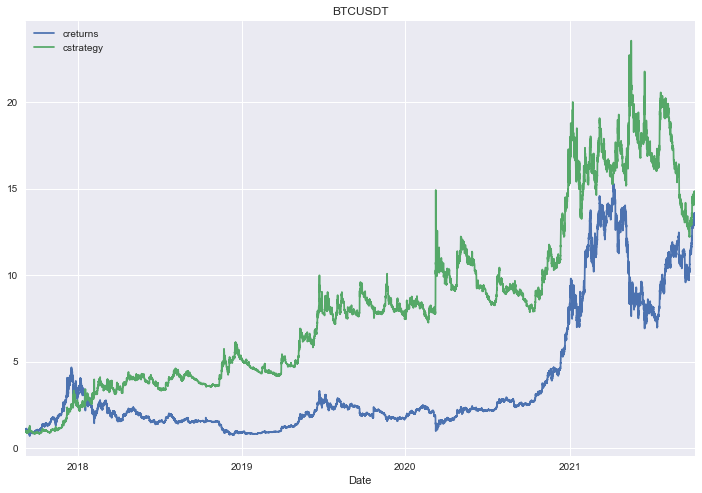

In [28]:
tester.plot_results()

In [29]:
tester.results

,Close,returns,SMA_S,SMA_M,SMA_L,position,strategy,trades,creturns,cstrategy
Date,,,,,,,,,,
2017-09-05 14:00:00,4151.00,-0.018616,4090.022000,4238.4654,4484.04880,-1,NaN,0.0,0.981556,NaN
2017-09-05 15:00:00,4142.69,-0.002004,4124.868000,4233.3206,4483.49875,-1,0.002004,0.0,0.979591,1.002006
2017-09-05 16:00:00,4322.47,0.042482,4142.758667,4232.0870,4483.97610,-1,-0.042482,0.0,1.022102,0.960331
2017-09-05 17:00:00,4390.14,0.015534,4169.565333,4230.7076,4484.47295,-1,-0.015534,0.0,1.038104,0.945528
2017-09-05 18:00:00,4442.48,0.011852,4196.530000,4230.0346,4485.14535,-1,-0.011852,0.0,1.050480,0.934388
...,...,...,...,...,...,...,...,...,...,...
2021-10-07 19:00:00,56422.36,0.002434,56149.739333,56689.7668,54292.27430,0,0.000000,0.0,13.341773,14.279946
2021-10-07 20:00:00,56277.78,-0.002566,56109.306667,56708.6420,54326.76320,0,-0.000000,0.0,13.307586,14.279946
2021-10-07 21:00:00,56078.11,-0.003554,56051.268000,56714.2044,54362.12300,0,-0.000000,0.0,13.260371,14.279946


In [30]:
tester.results.trades.value_counts()

0.0    34764
1.0     1077
2.0        1
Name: trades, dtype: int64